In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Dark Matter - GADGET

In [15]:
import h5py
import time_conversion as tiempo

#Parámetros cosmológicos
#--------------------------------------------------------------------------
h=0.732
G = 4.299e-6
a0=1.
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
#---------------------------------------------------------------------------
vector = ('00','01','03')
vector2 = ('M31', 'MW', 'M33')
aux_vec = (r50_M31gd, r50_MWgd, r50_M33gd)

path2 = '/home/omarioni/'
atime = np.loadtxt(path2 + 'redshift_outputs.txt')
aexp = atime[:,2]


path = '/mnt/is2/alejandro/ornella/'

snapshot=range(496,50,-1) #SNAPSHOTS

for isnap in snapshot:
    
    snap = h5py.File(path+'outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    for i in range(0,3):
        cm   = snap['subhalo_0'+ str('%s'%vector[i])+ '/Center'].value
        r200 = snap['subhalo_0'+ str('%s'%vector[i])+ '/R200'].value
        pdrk = snap['subhalo_0'+ str('%s'%vector[i])+ '/Drk/Coordinates'].value
        mdrk = snap['subhalo_0'+ str('%s'%vector[i])+ '/Drk/Masses'].value

        z = a0/aexp[isnap] - 1.
        Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
        time = tiempo.conv(z, h, omega_lambda, omega_matter)

#paso las coordenadas respecto al centro de la galaxia
        xdrk = (pdrk[:,0]-cm[0])*aexp[isnap]/h
        ydrk = (pdrk[:,1]-cm[1])*aexp[isnap]/h
        zdrk = (pdrk[:,2]-cm[2])*aexp[isnap]/h
        r = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

#------------------------------------------------
        mdrk = mdrk/h #masa a unidades físicas

        r200 = r200*aexp[isnap]/h #radio virial a unidades fisicas

        limit1 = np.where(r < 0.4*aux_vec[i])
        r_ind1 = np.argsort(r[limit1])

        limit2 = np.where(r < 0.8*aux_vec[i])
        r_ind2 = np.argsort(r[limit2])

#         limit3 = np.where(r < 1.5)
#         r_ind3 = np.argsort(r[limit3])

        Mc_05 = cumsum(mdrk[limit1][r_ind1])
        Mdrk_05 = Mc_05[-1]

        Mc_10 = cumsum(mdrk[limit2][r_ind2])
        Mdrk_10 = Mc_10[-1]

#         Mc_15 = cumsum(mdrk[limit3][r_ind3])
#         Mdrk_15 = Mc_15[-1]
    
#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
        path3 = '/home/omarioni/Barras_GdGs/Barras_Gd/_data/'
        archivo1 =  open(path3 +str('%s'%vector2[i])+'_Mdrk_time2.dat','a')
        archivo1.write(str('%03d'%isnap) +'\t'+
                    str('%12.6f'% time) +'\t'+
                    str('%12.6f'% (Mdrk_05*1e10)) +'\t'+
                    str('%12.6f'% (Mdrk_10*1e10)) +'\n')
#                     str('%12.6f'% (Mdrk_15*1e10)) +'\n')
        archivo1.close()
#------------------------------------------------------------------------------------

## Mdrk_time esta hecha en 0.5, 1.0, 1.5
## Mdrk_time2 esta hecha en r50*0.8 y r50*0.4

# Dark Matter- GASOLINE

In [16]:
import h5py
import rotation as rot
import barstrength as strng

#Parámetros cosmológicos
#--------------------------------------------------------------------------
G = 4.299e-6
a0=1.
#---------------------------------------------------------------------------
vector = (1,2,4)
vector2 = ('M31', 'MW', 'M33')
aux_vec = (r50_M31gs, r50_MWgs, r50_M33gs)

#path = 'home/ornela/SimCLUES/'
path = '/mnt/sersic2/omarioni/'

snapshot = np.loadtxt(path + 'Gasoline/snapshots.txt', dtype='string')


for j in range(len(snapshot)-1,0,-1):
    snap = h5py.File(path + 'Gasoline/outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
    
    for i in range(0,3):
        cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'].value
        r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'].value
        time = snap['subhalo_00'+ str('%s' %vector[i])+ '/Time'].value
        h    = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'].value
        aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'].value

        pdrk = snap['subhalo_00'+ str('%s' %vector[i])+ '/Drk/Coordinates'].value
        mdrk = snap['subhalo_00'+ str('%s' %vector[i])+ '/Drk/Masses'].value
    

#paso las coordenadas respecto al centro de la galaxia
        xdrk = (pdrk[:,0]-cm[0])
        ydrk = (pdrk[:,1]-cm[1])
        zdrk = (pdrk[:,2]-cm[2])
        r = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

#------------------------------------------------
        limit1 = np.where(r < 0.4*aux_vec[i])
        r_ind1 = np.argsort(r[limit1])

        limit2 = np.where(r < 0.8*aux_vec[i])
        r_ind2 = np.argsort(r[limit2])

#         limit3 = np.where(r < 1.5)
#         r_ind3 = np.argsort(r[limit3])

        Mc_05 = cumsum(mdrk[limit1][r_ind1])
        Mdrk_05 = Mc_05[-1]

        Mc_10 = cumsum(mdrk[limit2][r_ind2])
        Mdrk_10 = Mc_10[-1]

#         Mc_15 = cumsum(mdrk[limit3][r_ind3])
#         Mdrk_15 = Mc_15[-1]
    
#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
        path2 = '/home/omarioni/Barras_GdGs/Barras_Gs/_data/'
        archivo1 =  open(path2 + str('%s' %vector2[i])+ '_Mdrk_time2.dat','a')
        archivo1.write(str('%s'%snapshot[j]) +'\t'+
                str('%12.6f'% time) +'\t'+
                str('%12.6f'% Mdrk_05) +'\t'+
                str('%12.6f'% Mdrk_10) +'\n')
#                 str('%12.6f'% Mdrk_15) +'\n')
        archivo1.close()
#------------------------------------------------------------------------------------

In [3]:
# path = '/home/ornela/PYTHON/'
path = '/home/omarioni/'

M31_gd = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M31_Mdrk_time2.dat')
time_M31gd   = M31_gd[:,1]
Mdrk05_M31gd = M31_gd[:,2]
Mdrk10_M31gd = M31_gd[:,3]
# Mdrk15_M31gd = M31_gd[:,4]

#------------------------------------------------------------------------------------------

MW_gd = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_Mdrk_time2.dat')
time_MWgd   = MW_gd[:,1]
Mdrk05_MWgd = MW_gd[:,2]
Mdrk10_MWgd = MW_gd[:,3]
# Mdrk15_MWgd = MW_gd[:,4]

#------------------------------------------------------------------------------------------
M33_gd = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M33_Mdrk_time2.dat')
time_M33gd   = M33_gd[:,1]
Mdrk05_M33gd = M33_gd[:,2]
Mdrk10_M33gd = M33_gd[:,3]
# Mdrk15_M33gd = M33_gd[:,4]
#------------------------------------------------------------------------------------------

M31_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M31_Mdrk_time2.dat')
time_M31gs   = M31_gs[:,1]
Mdrk05_M31gs = M31_gs[:,2]
Mdrk10_M31gs = M31_gs[:,3]
# Mdrk15_M31gs = M31_gs[:,4]

#------------------------------------------------------------------------------------------
MW_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_Mdrk_time2.dat')
time_MWgs   = MW_gs[:,1]
Mdrk05_MWgs = MW_gs[:,2]
Mdrk10_MWgs = MW_gs[:,3]
# Mdrk15_MWgs = MW_gs[:,4]
#------------------------------------------------------------------------------------------

M33_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M33_Mdrk_time2.dat')
time_M33gs   = M33_gs[:,1]
Mdrk05_M33gs = M33_gs[:,2]
Mdrk10_M33gs = M33_gs[:,3]
# Mdrk15_M33gs = M33_gs[:,4]


In [4]:
path = '/home/omarioni/'

radios_M31gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M31_radios.dat')
r50_M31gd  = radios_M31gd[1]

radios_MWgd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_radios.dat')
r50_MWgd  = radios_MWgd[1]

radios_M33gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M33_radios.dat')
r50_M33gd  = radios_M33gd[1]

radios_M31gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M31_radios.dat')
r50_M31gs  = radios_M31gs[1]

radios_MWgs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_radios.dat')
r50_MWgs  = radios_MWgs[1]

radios_M33gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M33_radios.dat')
r50_M33gs  = radios_M33gs[1]

In [5]:
print r50_M31gd
print r50_MWgd
print r50_M33gd
print '--------'
print r50_M31gs
print r50_MWgs
print r50_M33gs

1.61058962345
2.40027570724
3.73966884613
--------
0.867003023624
2.23918104172
2.58009195328


In [6]:
path = '/home/omarioni/'

M31_gd = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M31_lbarvstime2.dat')
lbar_M31gd = M31_gd[:,1][0]
#------------------------------------------------------------------------------------------

M31_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M31_lbarvstime.dat')
lbar_M31gs = M31_gs[:,1][0]

#------------------------------------------------------------------------------------------
MW_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_lbarvstime.dat')
lbar_MWgs = MW_gs[:,1][0]

In [7]:
print lbar_M31gd, lbar_M31gd/r50_M31gd, r50_M31gd*0.8
print lbar_M31gs, lbar_M31gs/r50_M31gs, r50_M31gs*0.8
print lbar_MWgs,  lbar_MWgs/r50_MWgs,   r50_MWgs*0.8

1.393432 0.865168867172 1.28847169876
0.837873 0.966401474008 0.6936024189
1.297434 0.57942344805 1.79134483337


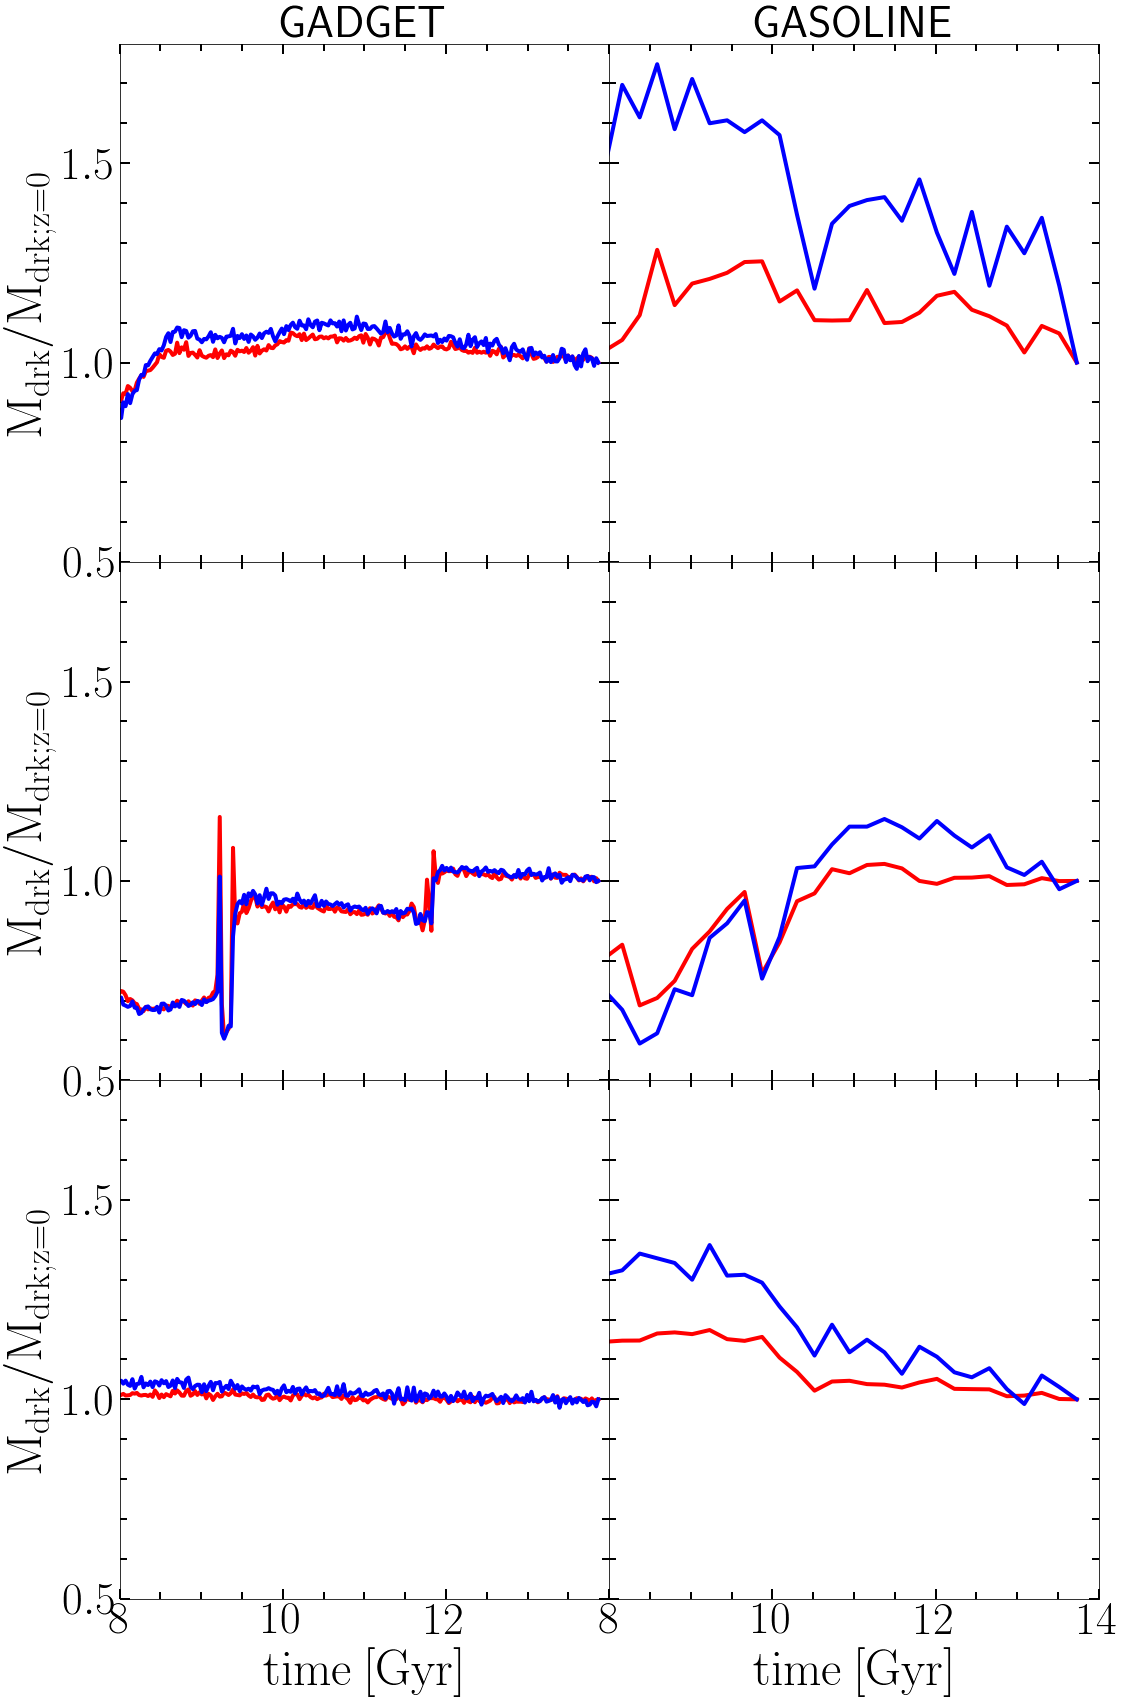

In [8]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 24), sharey=True)#, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.07, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

# Mdrk15, = ax[0,0].plot(time_M31gd ,Mdrk15_M31gd/Mdrk15_M31gd[0],'-', lw=5, color='r')
Mdrk10, = ax[0,0].plot(time_M31gd ,Mdrk10_M31gd/Mdrk10_M31gd[0],'-', lw=4, color='r')
Mdrk05, = ax[0,0].plot(time_M31gd ,Mdrk05_M31gd/Mdrk05_M31gd[0],'-', lw=4, color='b')


# ax[0,0].plot(time_M31gd2 ,A2max_M31gd2,'-', lw=3, color='r')
ax[0,0].set_ylabel(r'$\mathrm{M_{drk}/M_{drk;z=0}}$', fontsize=50)
ax[0,0].set_xticks([2,4,6,8,10,12])
ax[0,0].set_xticklabels([])
# ax[0,0].set_yscale('log')
# ax[0,0].set_yticks([-0.4,-0.3,-0.2,-0.1,0,0.1,0.2])
# ax[0,0].set_ylim(-0.5,0.2)
ax[0,0].set_xlim(8,14)
ax[0,0].set_ylim(0.5,1.8)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=45)
ax[0,0].tick_params('both', length=7,  width=2,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')

ax[0,0].set_title('GADGET', loc='center', fontsize=45)

# ax[0,0].text(13, 3.2, '$\mathrm{A}$', fontsize=45, color='k',ha='center', va='bottom')
# ax[0,0].legend([Mdrk05, Mdrk10, Mdrk15],
#                [r'$\mathrm{r\:<\:0.5\:kpc}$', r'$\mathrm{r\:<\:1.0\:kpc}$', r'$\mathrm{r\:<\:1.5\:kpc}$'],
#                fontsize=45, frameon=False, loc=2)

#------------------------------------------------------

# ax2=fig.add_subplot(222)
# ax[0,1].plot(time_M31gs ,Mdrk15_M31gs/Mdrk15_M31gs[0],'-', lw=5, color='r')
ax[0,1].plot(time_M31gs ,Mdrk10_M31gs/Mdrk10_M31gs[0],'-', lw=4, color='r')
ax[0,1].plot(time_M31gs ,Mdrk05_M31gs/Mdrk05_M31gs[0],'-', lw=4, color='b')
# ax[0,1].plot(time_M31gs2 ,A2max_M31gs2,'-',lw=3, color='r')
ax[0,1].set_xticks([2,4,6,8,10,12,14])
ax[0,1].set_xticklabels([])
# ax[0,1].set_yticks([0,1,2,3,4])
# ax[0,1].set_yticklabels([])
# ax[0,1].set_ylim(0,4)
ax[0,1].set_xlim(8,14)
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=45)
ax[0,1].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')
ax[0,1].set_title('GASOLINE', loc='center', fontsize=45)
# ax[0,1].text(13, 3.2, '$\mathrm{B}$', fontsize=45, color='k', ha='center', va='bottom')

# # #---------------------------------------------------------

# ax3=fig.add_subplot(223)
# ax[1,0].plot(time_MWgd ,Mdrk15_MWgd/Mdrk15_MWgd[0],'-', lw=5, color='r')
ax[1,0].plot(time_MWgd ,Mdrk10_MWgd/Mdrk10_MWgd[0],'-', lw=4, color='r')
ax[1,0].plot(time_MWgd ,Mdrk05_MWgd/Mdrk05_MWgd[0],'-', lw=4, color='b')
ax[1,0].set_xticks([0,2,4,6,8,10,12])
ax[1,0].set_xticklabels([])
# ax[1,0].set_yticks([0,1,2,3])
# ax[0,1].set_yticklabels([])
ax[1,0].set_ylabel(r'$\mathrm{M_{drk}/M_{drk;z=0}}$', fontsize=50)
# ax[1,0].set_xlabel(r'$\mathrm{time\:[Gyr]}$', fontsize=50)
ax[1,0].set_xlim(8,14)
# ax[1,0].set_ylim(0,4)
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=45)
ax[1,0].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')

# ax[1,0].text(13, 3.2, '$\mathrm{C}$', fontsize=45, color='k',ha='center', va='bottom')


# # #---------------------------------------------------------------------------------------
# # ax4=fig.add_subplot(224)
# ax[1,1].plot(time_MWgs ,Mdrk15_MWgs/Mdrk15_MWgs[0],'-', lw=5, color='r')
ax[1,1].plot(time_MWgs ,Mdrk10_MWgs/Mdrk10_MWgs[0],'-', lw=4, color='r')
ax[1,1].plot(time_MWgs ,Mdrk05_MWgs/Mdrk05_MWgs[0],'-', lw=4, color='b')
# ax[1,1].plot(time_MWgs2 ,A2max_MWgs2,'-', lw=3, color='r')
ax[1,1].set_xticks([0,2,4,6,8,10,12,14])
# ax[1,1].set_yticks([0,1,2,3])
ax[1,1].set_xticklabels([])
# ax[1,1].set_xlabel(r'$time\:[Gyr]$', fontsize=40)
ax[1,1].set_xlim(8,14)
# ax[1,1].set_ylim(0,4)
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=45)
ax[1,1].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[1,1].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')

# ax[1,1].text(13, 3.2, '$\mathrm{D}$', fontsize=45, color='k', ha='center', va='bottom')

# # #---------------------------------------------------------

# ax3=fig.add_subplot(223)
# ax[2,0].plot(time_M33gd ,Mdrk15_M33gd/Mdrk15_M33gd[0],'-', lw=5, color='r')
ax[2,0].plot(time_M33gd ,Mdrk10_M33gd/Mdrk10_M33gd[0],'-', lw=4, color='r')
ax[2,0].plot(time_M33gd ,Mdrk05_M33gd/Mdrk05_M33gd[0],'-', lw=4, color='b')
ax[2,0].set_xticks([0,2,4,6,8,10,12])
# ax[1,0].set_xticklabels([])
# ax[1,0].set_yticks([0,1,2,3])
# ax[0,1].set_yticklabels([])
ax[2,0].set_ylabel(r'$\mathrm{M_{drk}/M_{drk;z=0}}$', fontsize=50)
ax[2,0].set_xlabel(r'$\mathrm{time\:[Gyr]}$', fontsize=50)
ax[2,0].set_xlim(8,14)
# ax[1,0].set_ylim(0,4)
ax[2,0].minorticks_on()
ax[2,0].tick_params( labelsize=45)
ax[2,0].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[2,0].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')

# ax[2,0].text(13, 3.2, '$\mathrm{E}$', fontsize=45, color='k',ha='center', va='bottom')


# # #---------------------------------------------------------------------------------------
# # ax4=fig.add_subplot(224)
# ax[2,1].plot(time_M33gs ,Mdrk15_M33gs/Mdrk15_M33gs[0],'-', lw=5, color='r')
ax[2,1].plot(time_M33gs ,Mdrk10_M33gs/Mdrk10_M33gs[0],'-', lw=4, color='r')
ax[2,1].plot(time_M33gs ,Mdrk05_M33gs/Mdrk05_M33gs[0],'-', lw=4, color='b')
# ax[1,1].plot(time_MWgs2 ,A2max_MWgs2,'-', lw=3, color='r')
ax[2,1].set_xticks([0,2,4,6,8,10,12,14])
# ax[1,1].set_yticks([0,1,2,3])
# ax[1,1].set_yticklabels([])
ax[2,1].set_xlabel(r'$\mathrm{time\:[Gyr]}$', fontsize=50)
ax[2,1].set_xlim(8,14)
# ax[1,1].set_ylim(0,4)
ax[2,1].minorticks_on()
ax[2,1].tick_params( labelsize=45)
ax[2,1].tick_params('both', length=7, width=2,which='minor', direction='in', right='on',top='on')
ax[2,1].tick_params('both', length=10, width=2,which='major', direction='in', right='on',top='on')

# ax[2,1].text(13, 3.2, '$\mathrm{F}$', fontsize=45, color='k', ha='center', va='bottom')

# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/Mdrk_time.pdf', dpi = 100, xxbox_inches='tight')
# fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/Mdrk_time.pdf', dpi = 100, xxbox_inches='tight')

plt.show()